In [136]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as ss
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


In [94]:
df = pd.read_csv('temperature.csv', index_col='Year')
df_cut = df.loc[[2020, 2021, 2022, 2023]]
df_cut


,Country,Avg_Temperature_degC,CO2_Emissions_tons_per_capita,Sea_Level_Rise_mm,Rainfall_mm,Population,Renewable_Energy_pct,Extreme_Weather_Events,Forest_Area_pct
Year,,,,,,,,,
2020,China,32.3,1.4,2.7,2100,1202028857,49.4,12,47.2
2020,Brazil,26.7,12.2,1.8,762,1106863791,46.8,0,69.1
2020,China,19.1,19.8,4.0,2152,1074542897,12.8,0,24.1
2020,Russia,18.6,5.7,3.7,1792,11186886,49.8,2,19.2
2020,China,22.7,3.2,4.1,812,491426196,19.4,0,44.8
...,...,...,...,...,...,...,...,...,...
2023,Argentina,29.0,18.3,4.5,2435,536217615,25.7,8,10.3
2023,USA,12.6,1.1,1.9,1594,572998076,8.9,0,63.9
2023,Australia,11.5,9.2,2.3,1910,1010451727,15.5,5,24.4


In [96]:
def plot_relational_plot(df):
    """
    To visualize the relationship between Rainfall and CO2 Emissions using scatter plot
    """
    fig, ax = plt.subplots(figsize = (10,6))
    plt.scatter(df_cut['Avg_Temperature_degC'], df_cut['CO2_Emissions_tons_per_capita'], color='purple', alpha=0.8, s=50, edgecolors='white', linewidths=0.5)
    plt.xlabel('Avegare Temperature (°C)', fontsize=14)
    plt.ylabel('CO2 Emissions (tons per capita)', fontsize=14)
    plt.title('Temperature vs. CO2 Emissions', fontsize=14, fontweight='bold')
    plt.grid(True, linestyle='--')
    plt.tight_layout()
    plt.savefig('relational_plot.png')
    plt.show()
    return



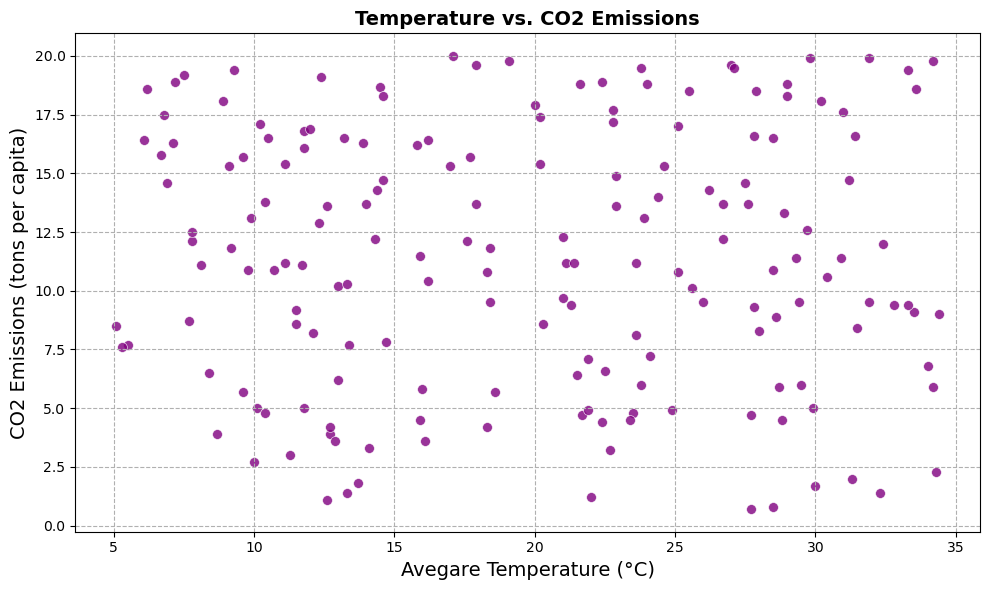

In [98]:
plot_relational_plot(df)

In [100]:
def plot_categorical_plot(df):
    """
    To compare the Average Temperature across different countries.
    """
    fig, ax = plt.subplots(figsize = (10,6))
    sns.barplot(x='Country', y='Avg_Temperature_degC', data=df, ax=ax)
    
    ax.set_xlabel('Country')
    ax.tick_params(axis='x', rotation=45)
    ax.set_ylabel('Average Temperature (°C)')
    ax.set_title('Average Temperature by Country')

    plt.savefig('categorical_plot.png')
    plt.show()

    return 

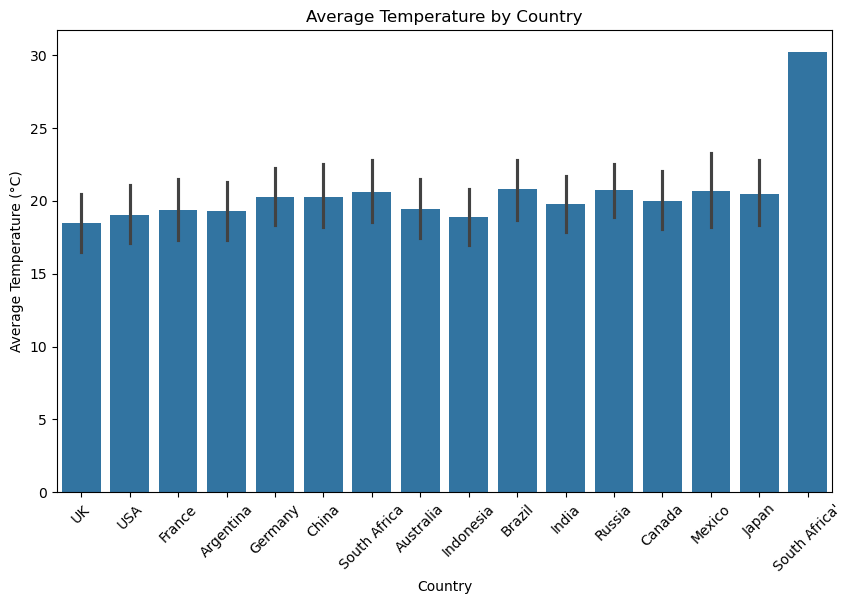

In [102]:
 plot_categorical_plot(df)

In [85]:
def plot_statistical_plot(df):
    fig, ax = plt.subplots(figsize=(12, 8))  # Set figure size directly here
    
    sns.boxplot(x='Country', y='CO2_Emissions_tons_per_capita', data=df, ax=ax)
    
    ax.set_title('CO2 Emissions per Capita by Country')  # Correct title formatting
    ax.set_xlabel('Country')
    ax.set_ylabel('CO2 Emissions (tons per capita)')
    
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels properly

    plt.savefig('statistical_plot.png')  # Save before showing the plot
    plt.show()

    return  # Return figure if needed


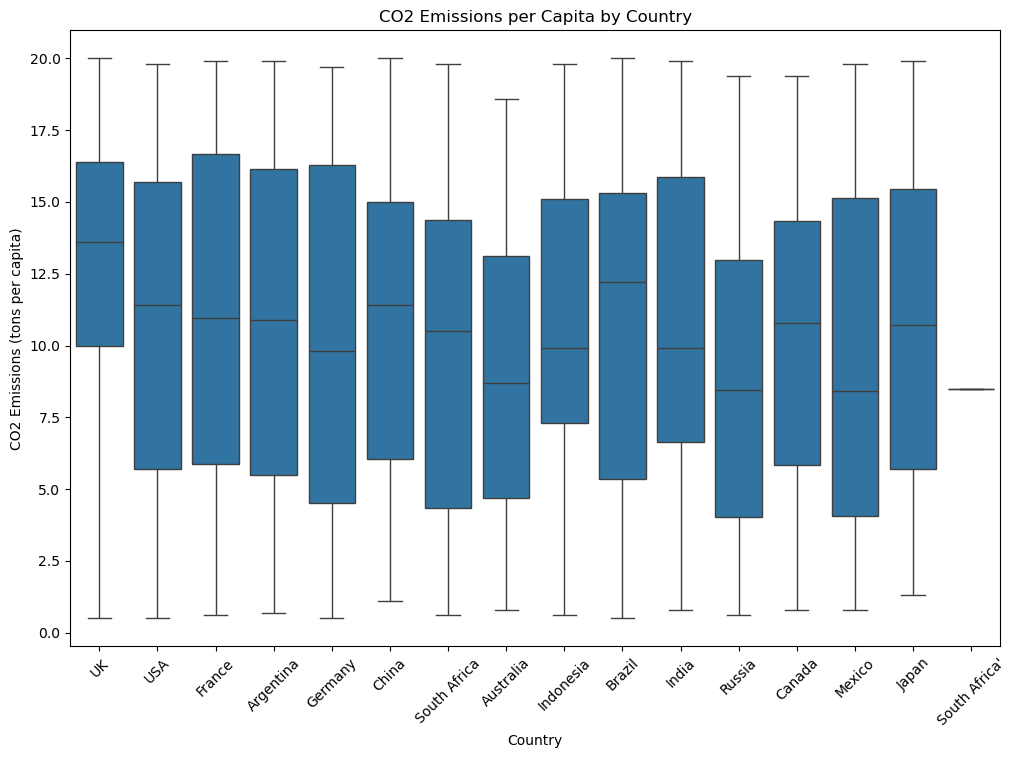

In [87]:
 plot_statistical_plot(df)

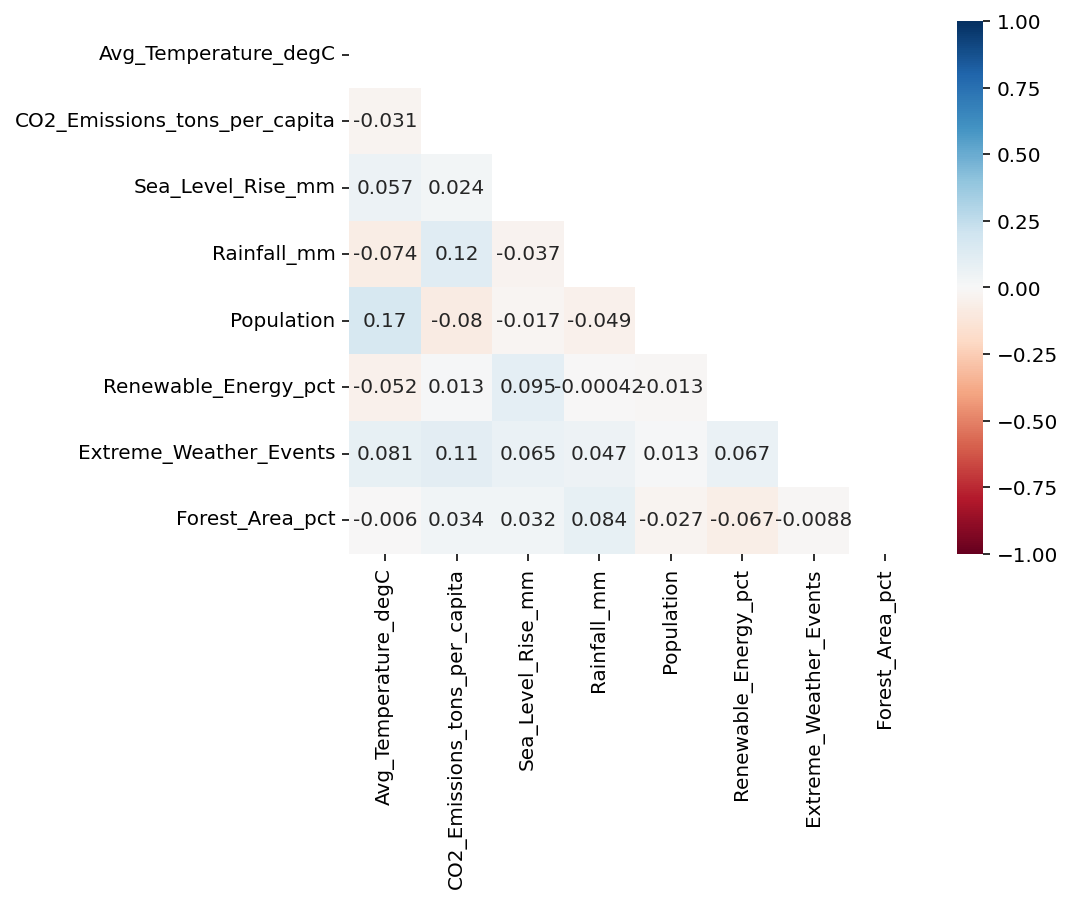

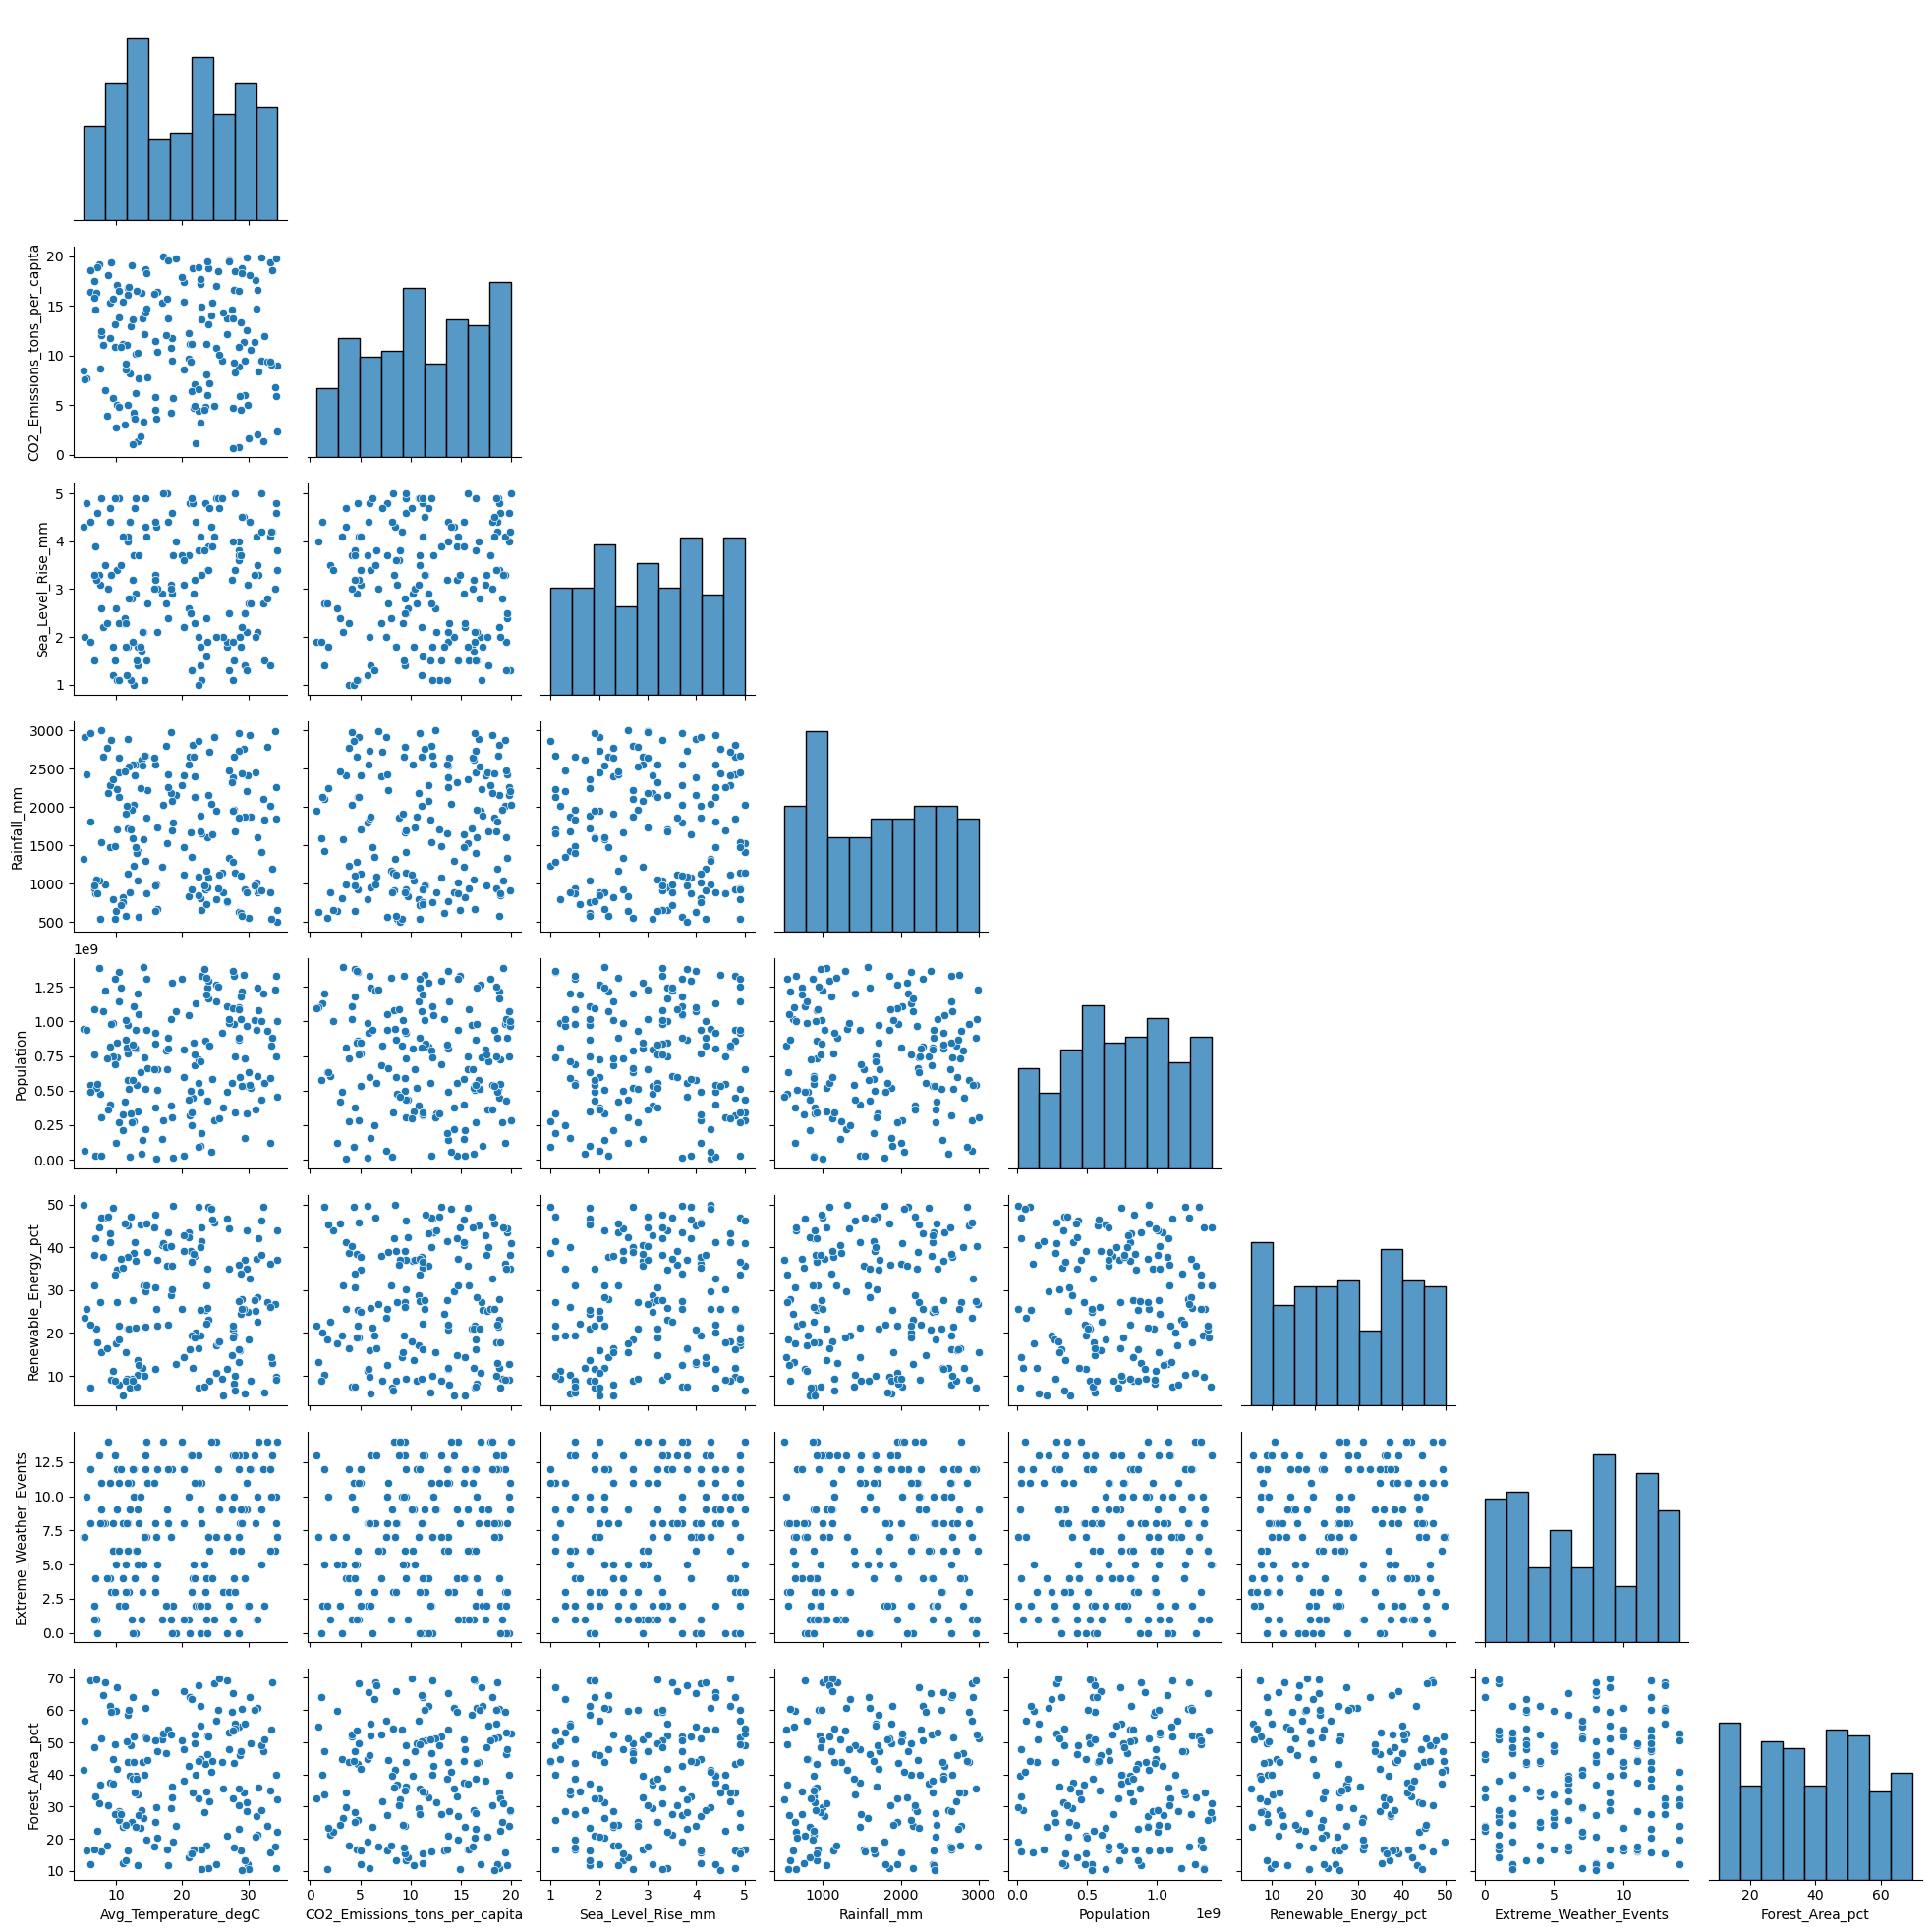

In [106]:
fig, ax = plt.subplots(dpi=144)
numeric_df = df_cut.select_dtypes(include='number')
mask = np.triu(np.ones_like(numeric_df.corr()))
sns.heatmap(numeric_df.corr(), ax=ax, vmin=-1, vmax=1, cmap='RdBu', annot=True, mask=mask)
plt.show()

sns.pairplot(df_cut, corner=True)
plt.show()

In [152]:
from sklearn.preprocessing import MinMaxScaler
df_clust = df[['Population', 'Avg_Temperature_degC']].copy()
scaler = MinMaxScaler()
norm = scaler.fit_transform(df_clust)
inv_norm = scaler.inverse_transform(norm)
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, n_init=20)
    kmeans.fit(norm)     # fit done on x,y pairs
    labels = kmeans.labels_

In [154]:
def perform_clustering(df, Population, Avg_Temperature_degC):
    
    def plot_elbow_method(min_k, max_k, wcss, best_n):
        """
        Plots the elbow method between min_k and max_k
        """
        fig, ax = plt.subplots(dpi=144)
        ax.plot(range(min_k, max_k + 1), wcss, 'kx-')
        ax.scatter(best_n, wcss[best_n-min_k], marker='o', color='red', facecolors='none', s=50)
        ax.set_xlabel('k')
        ax.set_xlim(min_k, max_k)
        ax.set_ylabel('WCSS')
        plt.savefig('elbow_plot.png')
        plt.show()
        return

    def one_silhouette_inertia(n, xy):
        kmeans = KMeans(n_clusters=n, n_init=20)
        kmeans.fit(xy)
        labels = kmeans.labels_
    
        _score = silhouette_score(xy, labels)
        _inertia = kmeans.inertia_
        return _score, _inertia

    wcss = []
    best_n, best_score = None, -np.inf
    for n in range(2, 11):  # 2 to 10 clusters
        score, inertia = one_silhouette_inertia(n, norm)
        wcss.append(inertia)
        if score > best_score:
            best_n = n
            best_score = score
        print(f"{n:2g} clusters silhouette score = {score:0.2f}")

    print(f"Best number of clusters = {best_n:2g}")
    plot_elbow_method(2, 10, wcss, best_n)


    return labels, data, xkmeans, ykmeans, cenlabels


    

 2 clusters silhouette score = 0.37
 3 clusters silhouette score = 0.39
 4 clusters silhouette score = 0.41
 5 clusters silhouette score = 0.39
 6 clusters silhouette score = 0.36
 7 clusters silhouette score = 0.36
 8 clusters silhouette score = 0.37
 9 clusters silhouette score = 0.37
10 clusters silhouette score = 0.38
Best number of clusters =  4


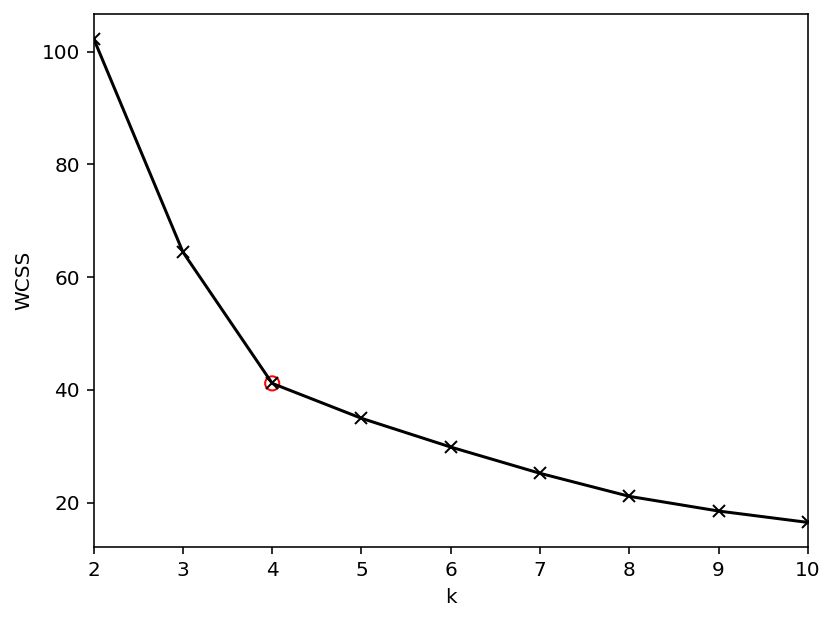

NameError: name 'data' is not defined

In [156]:
perform_clustering(df, 'Population', 'Avg_Temperature_degC')

In [ ]:
# Gather data and scale

    # Find best number of clusters
    one_silhouette_inertia()
    plot_elbow_method()

    # Get cluster centers
    return labels, data, xkmeans, ykmeans, cenlabels


In [ ]:
def plot_clustered_data(labels, data, xkmeans, ykmeans, centre_labels):
    fig, ax = plt.subplots()
    plt.savefig('clustering.png')
    return